Program calculates an approximate solution to a (for now) 1-dimensional PDE (can be generalized). The calculated solution is meant to utilize a Deep Learning Approach to approximate the Galerkin-Solution. The theoretical background of this approach is taken from the work of Carlo Marcati and Christoph Schwab in 
EXPONENTIAL CONVERGENCE OF DEEP OPERATOR NETWORKS FOR ELLIPTIC PARTIAL DIFFERENTIAL EQUATIONS


In [7]:
import import_ipynb
import math
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np

import initializeSettings as Sett
import TheoreticalSolution
import NeuralNetworkWeights


In [2]:
# create all necessary variables
p = 5 # polynomial degree
q = 6 # quadrature order
alpha = -1 # parameter used in weight calculation, -1 equals no parameter used, can improve performance

# grid points and weights for Gauß-Lobatto-Integration on (0,1)
ArrayPoints = Sett.initializePoints(q)
ArrayWeights = Sett.initializeWeights(q, ArrayPoints)  

BasisPhi = Sett.createBasis(p)

# consider the PDE -a(x)u''(x) + b(x)u'(x) + c(x)u(x) = f
# define all the coefficient functions, can be varied freely

a = lambda x: 1

b = lambda x:1

c = lambda x: 3

f = lambda x:x-0.5

# discretize the coefficient funcions into a q-dimensional vector
adiscrete = Sett.discretizeFunction(a, ArrayPoints) 
amin, amax = Sett.MinMax(a)

bdiscrete = Sett.discretizeFunction(b, ArrayPoints)

cdiscrete = Sett.discretizeFunction(c, ArrayPoints)



In [3]:
# calculates the theoretical solution (Galerkin) 
# calculates the first version of the weight vector, needs to be multiplied by (A+B+C)^-1 to get to the final version 
cfnb = TheoreticalSolution.cfnb(f, BasisPhi)

# calculates the theoretical approximated matrices A,B,C
Aanbnq = TheoreticalSolution.MatrixAanbnq(p, q, adiscrete, BasisPhi, ArrayWeights, ArrayPoints, alpha)
Bbnbnq = TheoreticalSolution.calculateTheoreticalMatrixB(p, q, ArrayPoints, ArrayWeights, BasisPhi, bdiscrete)
Ccnbnq = TheoreticalSolution.calculateTheoreticalMatrixC(p, q, ArrayPoints, ArrayWeights, BasisPhi, cdiscrete)

# calculates the final weight vector as (A+B+C)^-1 * cfnb
finalWeights = TheoreticalSolution.calculateTheoreticalSolutionFlexible(cfnb, Aanbnq, Ccnbnq, Bbnbnq)

# creates the polynomial that approximately solves the PDE
solutionPolynomial = TheoreticalSolution.createPolynomial(BasisPhi, finalWeights)


In [4]:
print(solutionPolynomial)

0.00118649 - 0.0784981 x + 0.2149735 x**2 - 0.14531289 x**3 +
0.03780114 x**4 - 0.02896364 x**5


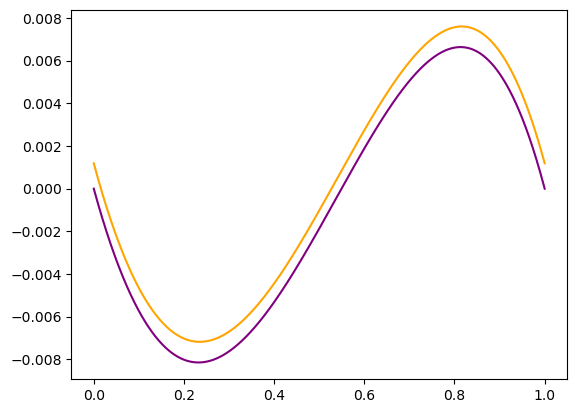

In [14]:
# plot the exact solution and the Galerkin-Solution
points = 10000
x_plot = np.linspace(0,1,points)
y_polPlot = np.polynomial.polynomial.polyval(x_plot, solutionPolynomial.coef)
y_TruePlot = 1/3 * x_plot + 0.291246* np.exp(-1.30278*x_plot) - 0.0134684 *np.exp(2.30278*x_plot) -0.277778
plt.plot(x_plot,y_polPlot, color = 'orange')
plt.plot(x_plot, y_TruePlot, color = 'purple')
plt.show()